# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [65]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [66]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + '&appid=' + weather_api_key + '&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | pevek
Processing Record 3 of Set 1 | mezen
Processing Record 4 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 5 of Set 1 | kavieng
Processing Record 6 of Set 1 | loandjili
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | kirakira
Processing Record 10 of Set 1 | cairns
Processing Record 11 of Set 1 | liwale
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | luau
Processing Record 15 of Set 1 | gizo
Processing Record 16 of Set 1 | maragogi
Processing Record 17 of Set 1 | baykit
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | santa cruz
Processing Record 20 of Set 1 | gorey
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | crab hill
City not found. Skipping...
Process

Processing Record 38 of Set 4 | balvi
Processing Record 39 of Set 4 | saldanha
Processing Record 40 of Set 4 | erdaojiang
Processing Record 41 of Set 4 | lorengau
Processing Record 42 of Set 4 | dzhebariki-khaya
Processing Record 43 of Set 4 | oksfjord
Processing Record 44 of Set 4 | phonhong
Processing Record 45 of Set 4 | vardo
Processing Record 46 of Set 4 | calca
Processing Record 47 of Set 4 | hofn
Processing Record 48 of Set 4 | aksarka
Processing Record 49 of Set 4 | oranjemund
Processing Record 0 of Set 5 | thompson
Processing Record 1 of Set 5 | norman wells
Processing Record 2 of Set 5 | oarai
Processing Record 3 of Set 5 | castro
Processing Record 4 of Set 5 | waddan
Processing Record 5 of Set 5 | gat
Processing Record 6 of Set 5 | buraydah
Processing Record 7 of Set 5 | hami
Processing Record 8 of Set 5 | mount gambier
Processing Record 9 of Set 5 | tasiilaq
Processing Record 10 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 5 | tiarei
Proce

Processing Record 30 of Set 8 | chaumont
Processing Record 31 of Set 8 | ridgecrest
Processing Record 32 of Set 8 | sinnamary
Processing Record 33 of Set 8 | nieves
Processing Record 34 of Set 8 | humberto de campos
Processing Record 35 of Set 8 | comodoro rivadavia
Processing Record 36 of Set 8 | ko samui
Processing Record 37 of Set 8 | charters towers
Processing Record 38 of Set 8 | zhigansk
Processing Record 39 of Set 8 | sao jose da coroa grande
Processing Record 40 of Set 8 | bilibino
Processing Record 41 of Set 8 | alofi
Processing Record 42 of Set 8 | marcona
City not found. Skipping...
Processing Record 43 of Set 8 | porto velho
Processing Record 44 of Set 8 | saint-philippe
Processing Record 45 of Set 8 | pandan
Processing Record 46 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 8 | necochea
Processing Record 48 of Set 8 | sillod
Processing Record 49 of Set 8 | coquimbo
Processing Record 0 of Set 9 | ananas
Processing Record 1 of Set 

Processing Record 18 of Set 12 | ulladulla
Processing Record 19 of Set 12 | homer
Processing Record 20 of Set 12 | port-gentil
Processing Record 21 of Set 12 | keti bandar
Processing Record 22 of Set 12 | bakchar
Processing Record 23 of Set 12 | intipuca
Processing Record 24 of Set 12 | southbridge
Processing Record 25 of Set 12 | alyangula
Processing Record 26 of Set 12 | tirumullaivasal
Processing Record 27 of Set 12 | kailua
Processing Record 28 of Set 12 | karratha
Processing Record 29 of Set 12 | odweyne
Processing Record 30 of Set 12 | maceio
Processing Record 31 of Set 12 | nantucket
Processing Record 32 of Set 12 | gebre guracha
Processing Record 33 of Set 12 | zhuhai
Processing Record 34 of Set 12 | camocim
Processing Record 35 of Set 12 | rawson
Processing Record 36 of Set 12 | kruisfontein
Processing Record 37 of Set 12 | tokur
Processing Record 38 of Set 12 | darnah
Processing Record 39 of Set 12 | plettenberg bay
Processing Record 40 of Set 12 | mingyue
Processing Record 4

In [68]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [69]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-23.29,96,99,4.89,RU,1675266070
1,pevek,69.7008,170.3133,-18.28,95,95,0.13,RU,1675266070
2,mezen,65.8522,44.2400,-4.59,87,100,5.40,RU,1675266072
3,kavieng,-2.5744,150.7967,26.88,82,91,4.47,PG,1675266074
4,loandjili,-4.7561,11.8578,31.06,66,20,6.17,CG,1675266074


In [70]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [71]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

#Pull out the datetime and convert date
ts = int(city_data_df.iloc[0]['Date'])

converted = datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
date = converted[0:10]


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

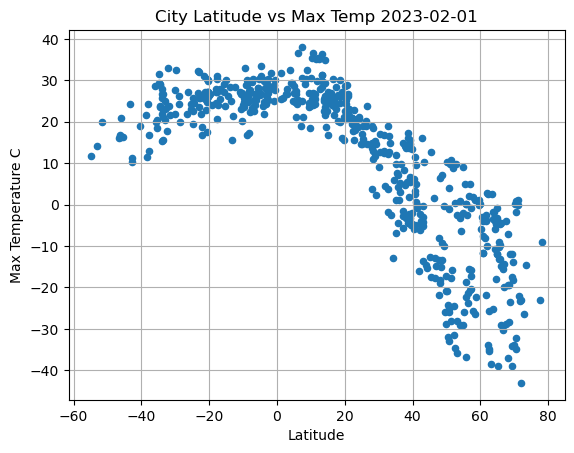

In [72]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter',x = 'Lat',y='Max Temp',title=f"City Latitude vs Max Temp {date}",xlabel = 'Latitude',ylabel='Max Temperature C',grid=True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

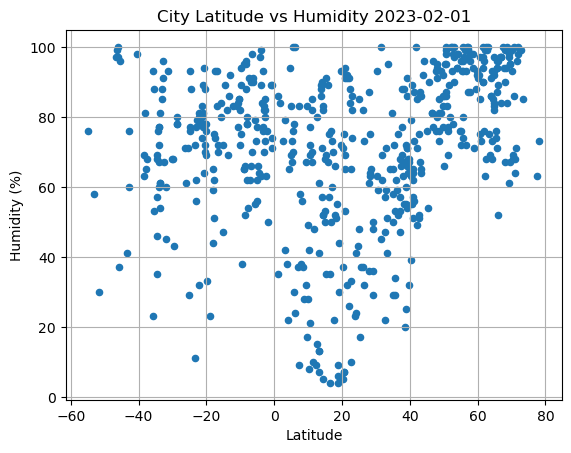

In [73]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter',x = 'Lat',y='Humidity',title=f"City Latitude vs Humidity {date}",xlabel = 'Latitude',ylabel='Humidity (%)',grid=True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

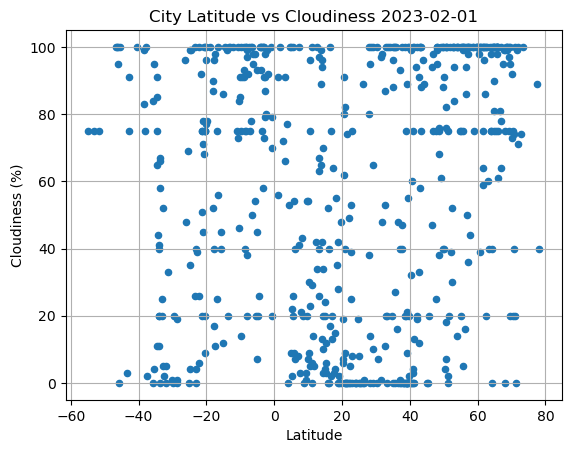

In [74]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter',x = 'Lat',y='Cloudiness',title=f"City Latitude vs Cloudiness {date}",xlabel = 'Latitude',ylabel='Cloudiness (%)',grid=True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

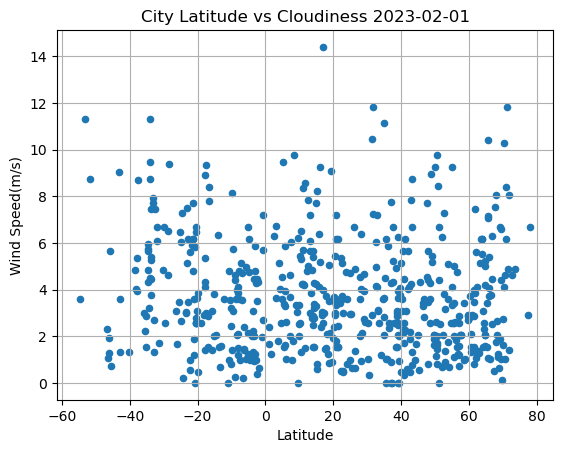

In [75]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter',x = 'Lat',y='Wind Speed',title=f"City Latitude vs Cloudiness {date}",xlabel = 'Latitude',ylabel='Wind Speed(m/s)',grid=True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [76]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df)['Lat'] >0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-23.29,96,99,4.89,RU,1675266070
1,pevek,69.7008,170.3133,-18.28,95,95,0.13,RU,1675266070
2,mezen,65.8522,44.2400,-4.59,87,100,5.40,RU,1675266072
5,qaanaaq,77.4840,-69.3632,-23.12,63,89,2.91,GL,1675266075
10,butaritari,3.0707,172.7902,26.74,79,91,6.72,KI,1675266080


In [77]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df)['Lat'] < 0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,kavieng,-2.5744,150.7967,26.88,82,91,4.47,PG,1675266074
4,loandjili,-4.7561,11.8578,31.06,66,20,6.17,CG,1675266074
6,hithadhoo,-0.6000,73.0833,27.63,71,70,5.71,MV,1675266075
7,kirakira,-10.4544,161.9205,26.87,85,46,3.55,SB,1675266076
8,cairns,-16.9167,145.7667,27.81,93,75,1.54,AU,1675266076


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8571128708679694


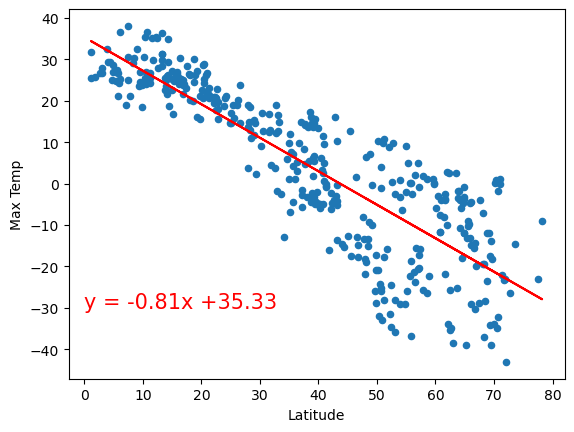

In [79]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
yvalues = northern_hemi_df['Lat'] * slope + intercept
line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
northern_hemi_df.plot(kind='scatter',x = 'Lat',y='Max Temp',xlabel = 'Latitude',ylabel='Max Temp')
plt.plot(northern_hemi_df['Lat'],yvalues,color='red')
plt.annotate(line,(0,-30),fontsize=15,color="red")

plt.show()

The r-value is: 0.534058294787537


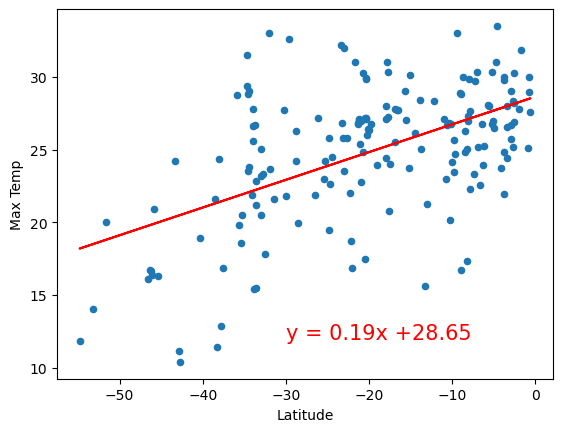

In [81]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
yvalues = southern_hemi_df['Lat'] * slope + intercept
line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
southern_hemi_df.plot(kind='scatter',x = 'Lat',y='Max Temp',xlabel = 'Latitude',ylabel='Max Temp')
plt.plot(southern_hemi_df['Lat'],yvalues,color='red')
plt.annotate(line,(-30,12),fontsize=15,color="red")

plt.show()

Takeaways: There is a very strong negative correlation between latitude and temperature in the northern hemisphere.  As you move further north, the temps drop!

In the southern hemisphere, there is a moderately positive relationship.  As you move north towards the equator, the temps get warmer.  

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.5379936294708758


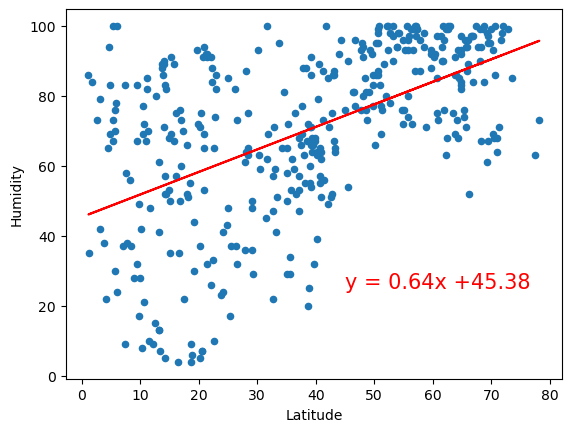

In [83]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
yvalues = northern_hemi_df['Lat'] * slope + intercept
line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
northern_hemi_df.plot(kind='scatter',x = 'Lat',y='Humidity',xlabel = 'Latitude',ylabel='Humidity')
plt.plot(northern_hemi_df['Lat'],yvalues,color='red')
plt.annotate(line,(45,25),fontsize=15,color="red")

plt.show()

The r-value is: 0.16625445588088336


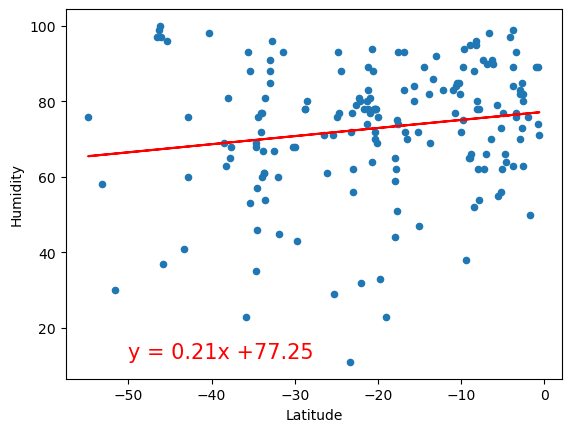

In [86]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
yvalues = southern_hemi_df['Lat'] * slope + intercept
line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
southern_hemi_df.plot(kind='scatter',x = 'Lat',y='Humidity',xlabel = 'Latitude',ylabel='Humidity')
plt.plot(southern_hemi_df['Lat'],yvalues,color='red')
plt.annotate(line,(-50,12),fontsize=15,color="red")

plt.show()

Takeaways: In the northern hemisphere, there is a moderately positve relationship between latitude and humidity.  In the southern hemisphere, there is no real correlation between the two factors.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.4242885022546372


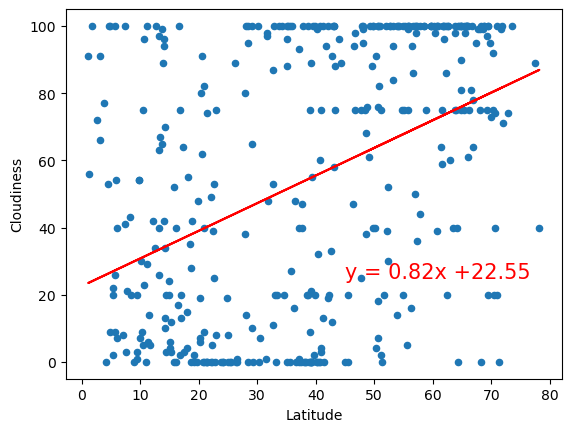

In [87]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
yvalues = northern_hemi_df['Lat'] * slope + intercept
line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
northern_hemi_df.plot(kind='scatter',x = 'Lat',y='Cloudiness',xlabel = 'Latitude',ylabel='Cloudiness')
plt.plot(northern_hemi_df['Lat'],yvalues,color='red')
plt.annotate(line,(45,25),fontsize=15,color="red")

plt.show()

The r-value is: 0.2596316281451938


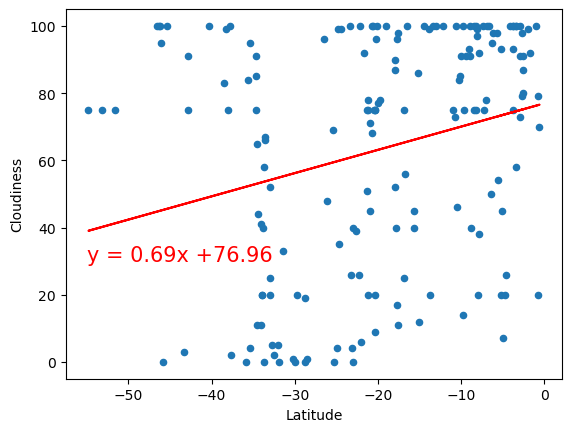

In [90]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
yvalues = southern_hemi_df['Lat'] * slope + intercept
line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
southern_hemi_df.plot(kind='scatter',x = 'Lat',y='Cloudiness',xlabel = 'Latitude',ylabel='Cloudiness')
plt.plot(southern_hemi_df['Lat'],yvalues,color='red')
plt.annotate(line,(-55,30),fontsize=15,color="red")

plt.show()

For the northern hemisphere, there is a weak positive correlation between latitude and cloudiness.  In the southern, there is a very weak positive correlation.  

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.03916300227425618


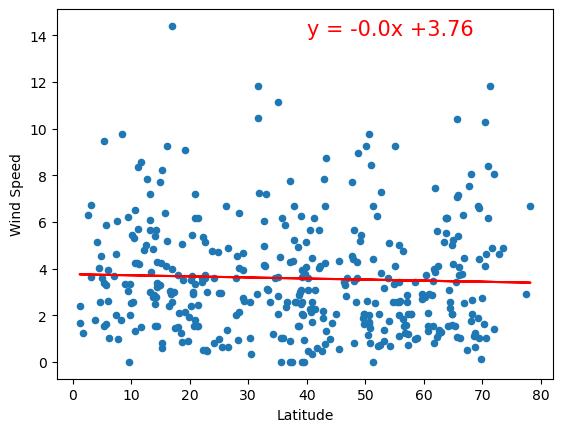

In [92]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
yvalues = northern_hemi_df['Lat'] * slope + intercept
line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
northern_hemi_df.plot(kind='scatter',x = 'Lat',y='Wind Speed',xlabel = 'Latitude',ylabel='Wind Speed')
plt.plot(northern_hemi_df['Lat'],yvalues,color='red')
plt.annotate(line,(40,14),fontsize=15,color="red")

plt.show()

The r-value is: -0.28800407869807804


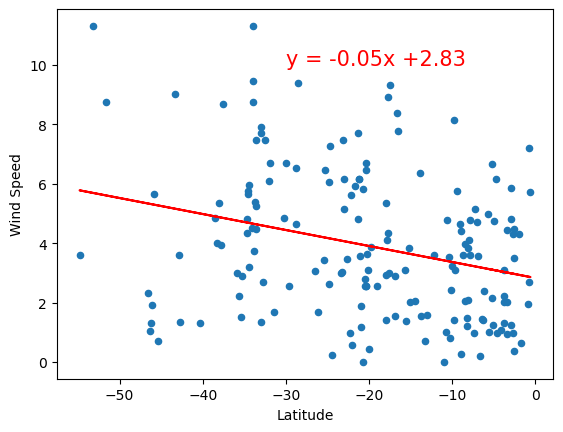

In [94]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
yvalues = southern_hemi_df['Lat'] * slope + intercept
line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
southern_hemi_df.plot(kind='scatter',x = 'Lat',y='Wind Speed',xlabel = 'Latitude',ylabel='Wind Speed')
plt.plot(southern_hemi_df['Lat'],yvalues,color='red')
plt.annotate(line,(-30,10),fontsize=15,color="red")

plt.show()

In the northern hemisphere, there is no correlation between Wind speend and latitude.  In the southern, there is a very weak negative correlation.  